# images.imutil

The images.imutil package provides general fits image tools such as header editing and image arithimetic.

<a id='notes'></a>

## Notes

Contents:

* [chpixtype](#chpixtype)
* [hedit](#hedit)
* [hselect](#hselect)
* [imarith/imdivide](#imarith)
* [imcopy](#imcopy)
* [imfunction/imexpr](#imfunction)
* [imheader](#imheader)
* [imhistogram](#imhistogram)
* [imreplace](#imreplace)
* [imslice](#imslice)
* [imstack](#imstack)
* [imstatistics](#imstatistics)
* [imsum](#imsum)
* [listpixels](#listpixels)

<br>

<a id='chpixtype'></a>

## chpixtype

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Chpixtype is a task that allows you to change the pixel type of a fits image.  There is built in functionality in ``astropy.io.fits`` to preform this task with the ``scale`` method.  Below you will find a table that translates the chpixtype newpixtype options into their equivalent ``numpy``/``astropy`` type (http://docs.scipy.org/doc/numpy/user/basics.types.html).

**Type Conversions**

| Chpixtype  | Numpy/Astropy Type|
|:----------:|:-----------------:|
| ``ushort`` | ``uint16``        |
| ``short``  | ``int16``         |
| ``int``    | ``int32``         |
| ``long``   | ``int64``         |
| ``real``   | ``float32``       |
| ``double`` | ``float64``       |


In [1]:
# Astronomy Specific Imports
from astropy.io import fits

In [ ]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

In [17]:
# Change this value to your desired data file, here were creating a filename
# for our new changed data
orig_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
new_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_newdtype_flt.fits'

# Read in your fits file
hdu = fits.open(orig_data)

# Edit the datatype
hdu[1].scale(type='int32')

# Save changed hdu object to new file
# The clobber argument tells the writeto method to overwrite if file already exists
hdu.writeto(new_data, clobber=True)
hdu.close()

<br>

<a id='hedit'></a>

## hedit

** Please review the [Notes](#notes) section above before running any examples in this notebook **

The hedit task allows users to edit an image header.  This functioanlity is covered in ``astropy.io.fits``.  Take note that to make changes to a fits file, you must use the ``mode='update'`` keyword in the ``fits.open`` call.  Below you'll find examples of editing a keyword if it does/doesn't exist, and how to delete keywords from the header.

In [2]:
# Astronomy Specific Imports
from astropy.io import fits

In [15]:
# Change this value to your desired data file
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Open fits file, include the mode='update' keyword
hdu = fits.open(test_data, mode='update')

# Simple header change, will add keyword if it doesn't not exist
hdu[0].header['MYKEY1'] = 'Editing this keyword'

# Only add keyword if it does not already exist:
if 'MYKEY2' not in hdu[0].header:
    hdu[0].header['MYKEY2'] = 'Also editing this'

# To delete keywords, first check if they exist:
if 'MYKEY2' in hdu[0].header:
    del hdu[0].header['MYKEY2']
    
# Close fits file, this will save your changes
hdu.close()

<br>

<a id='hselect'></a>

## hselect

** Please review the [Notes](#notes) section above before running any examples in this notebook **

hselect is used to pull out specific header keywords.  You can provide any filename string as you would in IRAF and it will be exapanded (wildcards are accepted).  You can also use specific keyword values to filter files.  We will be using the ``stak`` package ``Hselect`` class.  The output table is an ``astropy.table`` object and stored in the ``table`` attribute.

In [1]:
# Astronomy Specific Imports
from stak import Hselect

In [19]:
# Create Hselect object
myList = Hselect("/eng/ssb/iraf_transition/test_data/jcz*", "BUNIT,TIME-OBS", extension="0,1,2,3")
# Display output astropy table object in nice notebook formatting
myList.table.show_in_notebook()

idx,Filename,ExtNumber,BUNIT,TIME-OBS
0,/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits,0,--,01:04:51
1,/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits,1,ELECTRONS,--
2,/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits,2,ELECTRONS,--
3,/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits,3,UNITLESS,--
4,/eng/ssb/iraf_transition/test_data/jczgx1q1q_flc.fits,2,ELECTRONS,--
5,/eng/ssb/iraf_transition/test_data/jczgx1q1q_flc.fits,3,UNITLESS,--
6,/eng/ssb/iraf_transition/test_data/jczgx1q1q_flc.fits,0,--,02:16:10
7,/eng/ssb/iraf_transition/test_data/jczgx1q1q_flc.fits,1,ELECTRONS,--


In [20]:
# Create Hselect object using expression parsing
myList2 = Hselect("/eng/ssb/iraf_transition/test_data/jcz*", "BUNIT", extension="0,1,2,3",
                 expr="BUNIT='ELECTRONS'")
# Display output astropy table object with a standard print
print(myList2.table)

                       Filename                       ExtNumber   BUNIT  
----------------------------------------------------- --------- ---------
/eng/ssb/iraf_transition/test_data/jczgx1q1q_flc.fits         2 ELECTRONS
/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits         1 ELECTRONS
/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits         2 ELECTRONS
/eng/ssb/iraf_transition/test_data/jczgx1q1q_flc.fits         1 ELECTRONS


<br>

<a id='imarith'></a>

## imarith - imdivide

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Imarith and imdivide both provide functionality to apply basic operators to whole image arrays.  This task can be achieved with basic ``astropy.io.fits`` functionality along with ``numpy`` array functionality.

The basic operands (``+``,``-``,``/``,``*``) can all be used with an assignment operator in python (``+=``,``-=``,``/=``,``*=``).  See http://www.tutorialspoint.com/python/python_basic_operators.htm for more details

In [3]:
# Astronomy Specific Imports
from astropy.io import fits

In [62]:
# Basic operands (+,-,/,*)
# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
test_data2 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imarith_out.fits'

# Open fits file
hdu1 = fits.open(test_data1)
hdu2 = fits.open(test_data2)

# Here we add hdu2-ext1 to hdu1-ext1 by using the shortcute += operator
hdu1[1].data += hdu2[1].data

# If you are dividing and need to avoid zeros in the image use indexing
indx_zeros = [hdu2[4].data == 0]
indx_nonzeros = [hdu2[4].data != 0]
# Set this value as you would the divzero parameter in imarith
set_zeros = 999.9
hdu1[4].data[indx_nonzeros] /= hdu2[4].data[indx_nonzeros]
hdu1[4].data[indx_zeros] = 999.9

# Save your new file
# The clobber argument tells the writeto method to overwrite if file already exists
hdu1.writeto(output_data, clobber=True)

# Close hdu files
hdu1.close()
hdu2.close()

<br>

<a id='imcopy'></a>

## imcopy

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Imcopy allows users to copy a fits image to a new file. We can accomplish this using ``astropy.io.fits`` by saving our fits file to a new filename.

In [4]:
# Astronomy Specific Imports
from astropy.io import fits

In [11]:
# Change these values to your desired filenames
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imcopy_out.fits'

hdu = fits.open(test_data)
# The clobber argument tells the writeto method to overwrite if file already exists
hdu.writeto(output_data, clobber=True)
hdu.close()

<br>

<a id='imfunction'></a>

## imfunction - imexpr

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Imfunction will apply a function to the image pixel values in an image array.  Imexpr gives you similiar functionality with the added capability to combine different images using a user created expression.  We can accomplish this using the built in funcitonality of the ``numpy`` library (http://docs.scipy.org/doc/numpy/reference/routines.math.html)

If there is a particular function you would like to apply to your image array that you cannot find in the ``numpy`` library you can use the ``np.vectorize`` function, which can make any python function apply to each element of your array.  But keep in mind that ``np.vectorize`` is esentially looping over the array, and may not be the most efficient method (http://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html).

Example using exsisting numpy function:

In [1]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

In [2]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imfunction_out.fits'

# Here we use the cosine function as an example
hdu = fits.open(test_data)
sci = hdu[1].data

# When you call your new function, make sure to reassign the array to
# the new values if the original function is not changing values in place
hdu[1].data = np.cos(hdu[1].data)

# Now save out to a new file, and close the original file, changes will
# not be applied to the oiginal fits file.
hdu.writeto(output_data, clobber=True)
hdu.close()

Example using user defined function and ``np.vectorize``:

In [4]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imfunction2_out.fits'

# Here we use the following custom function as an example
def my_func(x):
    return (x**2)+(x**3)

# Now we open our file, and vectorize our function
hdu = fits.open(test_data)
sci = hdu[1].data
vcos = np.vectorize(my_func)

# When you call your new function, make sure to reassign the array to
# the new values if the original function is not changing values in place
hdu[1].data = vcos(hdu[1].data)

# Now save out to a new file, and close the original file, changes will
# not be applied to the oiginal fits file.
hdu.writeto(output_data)
hdu.close()

<br>

<a id='imheader'></a>

## imheader

** Please review the [Notes](#notes) section above before running any examples in this notebook **

The imheader task allows the user to list header parameters for a list of images.  Here we can use the ``astropy`` convenience function, ``fits.getheader()``

In [12]:
# Standard Imports
import numpy as np
import glob

# Astronomy Specific Imports
from astropy.io import fits

In [13]:
# Change these values to your desired data files, glob will capture all wildcard matches
test_data = glob.glob('/eng/ssb/iraf_transition/test_data/iczgs3y*')

for filename in test_data:
    # Pull the header from extension 1
    head = fits.getheader(filename, ext=1)
    print repr(head)

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1014                                                  
NAXIS2  =                 1014                                                  
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010'                                            
DATE    = '2016-06-02' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'iczgs3ygq        

<br>

<a id='imhistogram'></a>

## imhistogram

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Imhistogram will plot a customized histogram of the provided image data. To make a histogram in Python we are going to use matplotlibs ``hist`` function.  See the ``hist`` documentation for options to change the histogram type, scaling, bin sizes, and more (http://matplotlib.org/api/pyplot_api.html)

In [24]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

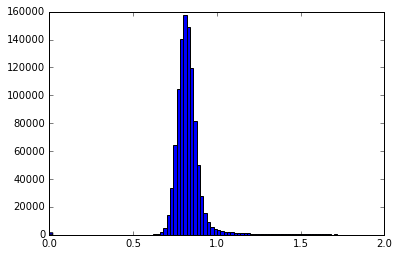

In [25]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Pull out the first science array, we also need to flatten the data before sending it to hist
sci1 = fits.getdata(test_data,ext=1)
sci1f = sci1.flatten()

# Now we can plot our histogram, using some of the optional keywords in hist
# The hist function returns the values of the histogram bins (n), the edges
# of the bins (obins), and the patches used to create the histogram
n, obins, patches = plt.hist(sci1f,bins=100,range=(0,2))

<br>

<a id='imreplace'></a>

## imreplace

** Please review the [Notes](#notes) section above before running any examples in this notebook **

We can use simple ``numpy`` array manipulation to replicate imreplace.  For details on how to grow the boolean array for replacement see crgrow, or the [``skimage.dilation`` documentation](http://scikit-image.org/docs/0.12.x/api/skimage.morphology.html?highlight=dilation#skimage.morphology.dilation).

In [26]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

In [71]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Pull out the first science array, make boolean mask with your requirements
hdu = fits.open(test_data)
sci1 = hdu[1].data
hdu.close()
mask1 = np.logical_and(sci1>0.5, sci1<0.6)

# Use mask to replace values
sci1[mask1] = 999

# We can also use numpy where to pull out index numbers
mask2 = np.where(sci1 > 1000)
print mask2

(array([ 474,  474,  606,  607,  607,  607,  608,  608,  608,  608,  609,
        609,  609,  609,  610,  610,  610,  804,  804,  809,  809,  810,
        883,  883, 1002, 1013]), array([455, 456, 285, 284, 285, 286, 284, 285, 286, 287, 284, 285, 286,
       287, 284, 285, 286, 349, 350,  53, 575,  53, 161, 162, 104, 460]))


<br>

<a id='imslice'></a>

## imslice

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Imslice can take a 3-D datacube fits image and return multiple 2D images sliced through the chosen dimension.  Keep in mind for the python equivalent workflow that the header file from the original input image will be used for all output images, including WCS information.  We will be using [``numpy.split``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.split.html#numpy.split).

In [40]:
# Astronomy Specific Imports
from astropy.io import fits

In [51]:
# Pull image data array and image header
orig_hdu = fits.open('/eng/ssb/iraf_transition/test_data/imstack_out.fits')
header1 = orig_hdu[0].header
image1 = orig_hdu[0].data
orig_hdu.close()

# Slice images easily by using numpy.split, which returns a list of the output arrays
arr_list = np.split(image1, 2)
print("final shape of a slice is:")
print(arr_list[0].shape)

# Now we can write this new array into a new fits files by packing it back into an HDU object
hdu1 = fits.PrimaryHDU(arr_list[0],header1)
hdu1.writeto('/eng/ssb/iraf_transition/test_data/imslice_out1.fits', clobber=True)
hdu2 = fits.PrimaryHDU(arr_list[1],header1)
hdu2.writeto('/eng/ssb/iraf_transition/test_data/imslice_out2.fits', clobber=True)

final shape of a slice is:
(1, 2048, 4096)


<br>

<a id='imcstack'></a>

## imstack

** Please review the [Notes](#notes) section above before running any examples in this notebook **

imstack can take multiple fits images and stack the data, writing out a new file where the fits data is 1-dimension higher then the input images.  Here we show that manipulation using the ``astropy`` library and [``numpy.stack``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html#numpy.stack).

In [25]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

In [36]:
# Pull two image data arrays and image header
header1 = fits.getheader('/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits',ext=1)
image1 = fits.getdata('/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits')
image2 = fits.getdata('/eng/ssb/iraf_transition/test_data/jczgx1q1q_flc.fits')

# Stack arrays, the new dimension will be put first, unless otherwise specified with the axis keyword
outstack = np.stack((image1,image2))
print("final shape is:")
print(outstack.shape)

# Now we can write this new array into a new fits file by packing it back into an HDU object
hdu = fits.PrimaryHDU(outstack,header1)
hdu.writeto('/eng/ssb/iraf_transition/test_data/imstack_out.fits', clobber=True)

final shape is:
(2, 2048, 4096)


<br>

<a id='imstatistics'></a>

## imstatistics

** Please review the [Notes](#notes) section above before running any examples in this notebook **

We will use the ``astropy.stats.sigma_clipped_stats`` function here, which has some wider capabilites then the imstatistics function.  Please see the ``stats`` [package documentation](http://docs.astropy.org/en/stable/api/astropy.stats.sigma_clipped_stats.html) for details on the advanced usage .

In [18]:
# Astronomy Specific Imports
from astropy.io import fits
from astropy import stats

In [19]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
sci1 = fits.getdata(test_data,ext=1)

# The sigma_clipped_stats function returns the mean, median, and stddev respectively
output = stats.sigma_clipped_stats(sci1,sigma=2.0,iters=3)
print output

(0.82121155347072006, 0.81694626808166504, 0.058198063937460652)


<br>

<a id='imsum'></a>

## imsum

** Please review the [Notes](#notes) section above before running any examples in this notebook **

We will be using the ``ccdproc`` ``Combiner`` class here.  Keep in mind that the original fits header is not retained in the ``CCDData`` object.  Please see the documentation for more details (http://ccdproc.readthedocs.io/en/latest/ccdproc/image_combination.html).

In [18]:
# Astronomy Specific Imports
from astropy.io import fits
from astropy import units
from ccdproc import CCDData, Combiner

In [17]:
# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'
test_data2 = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# First we need to pull out the science arrays to create CCDData objects
# Our acutal unit is electrons/sec, this is not accepted by the current
# set of units
cdata1 = CCDData.read(test_data1, hdu=1, unit=units.electron/units.s)
cdata2 = cdata1.copy()
cdata3 = CCDData.read(test_data2, hdu=1, unit=units.electron/units.s)
cdata4 = cdata3.copy()
combiner = Combiner([cdata1, cdata2, cdata3, cdata4])

# Now we can make our mask for extrema clipping
# The equivalent of low_reject, high_reject parameter
combiner.clip_extrema(nlow=1, nhigh=1)

# And finally to combine...
final_combine = combiner.average_combine()
print final_combine.data

INFO: using the unit electron / s passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [ccdproc.ccddata]
INFO: using the unit electron / s passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [ccdproc.ccddata]
[[  0.87720111   0.82106587   0.79521415 ...,   3.87308204   7.41545987
    9.01969481]
 [  0.89028609   0.7884455    0.8240625  ...,   0.86163342   4.53510189
    0.99109203]
 [  0.81683022   0.83273572   0.82175627 ...,   3.60699821  -7.82266164
    2.95994186]
 ..., 
 [ 40.72796059  15.36561799  -8.79329443 ...,  22.68277168  25.31048012
   28.829813  ]
 [ 46.28870392  -4.50218874   1.74757147 ...,  13.24364138  25.70440292
   11.0971849 ]
 [ 42.8106432   29.66250706  63.18441772 ...,   0.           9.80057049
   22.66858006]]


<br>

<a id='listpixels'></a>

## listpixels

** Please review the [Notes](#notes) section above before running any examples in this notebook **

listpixels was used to list an indexed section of a FITs data array.  This is easy to do using ``astropy``, but keep in mind that Python indexs from zero, and with the y-axis leading, i.e. [y,x].  You also want to end the cut with the pixel *after* the end pixel.  So to get 1-10 in x and 5-15 in y, you will index like so: array[4:15,0:10]

In [56]:
# Astronomy Specific Imports
from astropy.io import fits

In [58]:
# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'

# To quickly pull out the data array you can use the astropy convience fucntion
data_arr = fits.getdata(test_data1,ext=1)

# Now we can index the array as desired, we're cutting out 5 in y, and 2 in x
print data_arr[0:5,0:2]

[[ 0.86692303  0.80678135]
 [ 0.83312052  0.76854318]
 [ 0.77341086  0.80276382]
 [ 0.80539584  0.78261763]
 [ 0.78274417  0.82206035]]


<br>

## Not Replacing

* imrename - can use command line utilities or the Python ``os`` package for  this functionality.
* imdelete - can use command line utilities or the Python ``os`` package for  this functionality.
* imtile - **may** replace infuture
* sections - IRAF utility function
* imgets - see [**images.imutil.hselect**](#hselect)
* minmax - see [**images.imutil.imstat**](#imstat)

For questions or comments please see [our github page](https://github.com/spacetelescope/stak).  We encourage and appreciate user feedback.